<a href="https://colab.research.google.com/github/alisha12548/AI/blob/main/Fe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load sample Titanic data
data = pd.DataFrame({
    'Name': ['John', 'Mary', 'Ali', 'Fatima', 'Ahmed'],
    'Age': [22, 38, 26, 35, 28],
    'gender': ['male', 'female', 'male', 'female', 'male'],
    'TicketClass': [3, 1, 3, 1, 2],
    'Survived': [0, 1, 1, 1, 0]
})

print("Original Data:")
print(data)


Original Data:
     Name  Age  gender  TicketClass  Survived
0    John   22    male            3         0
1    Mary   38  female            1         1
2     Ali   26    male            3         1
3  Fatima   35  female            1         1
4   Ahmed   28    male            2         0


In [ ]:
data['IsMale'] = data['gender'].map({'male': 1, 'female': 0})
data = data.drop('gender', axis=1)

In [ ]:
data

,Name,Age,TicketClass,Survived,IsMale
0,John,22,3,0,1
1,Mary,38,1,1,0
2,Ali,26,3,1,1
3,Fatima,35,1,1,0
4,Ahmed,28,2,0,1


In [ ]:
data = pd.get_dummies(data, columns=['TicketClass'], prefix='Class')


In [ ]:
data

,Name,Age,Survived,IsMale,Class_1,Class_2,Class_3
0,John,22,0,1,False,False,True
1,Mary,38,1,0,True,False,False
2,Ali,26,1,1,False,False,True
3,Fatima,35,1,0,True,False,False
4,Ahmed,28,0,1,False,True,False


In [ ]:
data = data.drop('Name', axis=1)
print("After Feature Engineering:")
print(data)

After Feature Engineering:
   Age  Survived  IsMale  Class_1  Class_2  Class_3
0   22         0       1    False    False     True
1   38         1       0     True    False    False
2   26         1       1    False    False     True
3   35         1       0     True    False    False
4   28         0       1    False     True    False


In [ ]:
import pandas as pd
import seaborn as sns


data = sns.load_dataset("titanic")


data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print("Shape of dataset:", data.shape)
print("\nData Info:")
print(data.info())

Shape of dataset: (891, 15)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
threshold = 0.5
data = data.loc[:, data.isnull().mean() < threshold]

In [ ]:
data['age'] = data['age'].fillna(data['age'].median())


In [ ]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])

In [ ]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


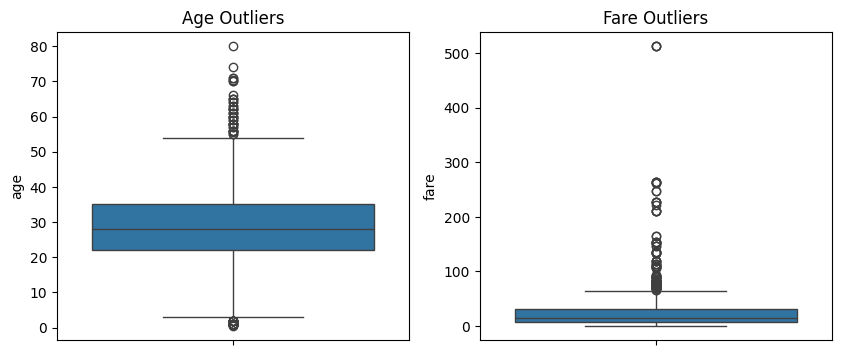

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data['age'])
plt.title("Age Outliers")

plt.subplot(1,2,2)
sns.boxplot(data['fare'])
plt.title("Fare Outliers")

plt.show()

In [ ]:
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['fare'] >= Q1 - 1.5*IQR) & (data['fare'] <= Q3 + 1.5*IQR)]
print(data)
print(Q1 - 1.5*IQR)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
2           1       3  female  26.0      0      0   7.9250        S   Third   
4           0       3    male  35.0      0      0   8.0500        S   Third   
5           0       3    male  28.0      0      0   8.4583        Q   Third   
7           0       3    male   2.0      3      1  21.0750        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  28.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['age', 'fare']] = scaler.fit_transform(data[['age', 'fare']])
data[['age', 'fare']].head()

,age,fare
0,-0.499795,-0.813749
2,-0.186156,-0.748316
4,0.519531,-0.736198
5,-0.029337,-0.696618
7,-2.067990,0.526425


In [ ]:
import pandas as pd
import seaborn as sns


data = sns.load_dataset("titanic")


data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


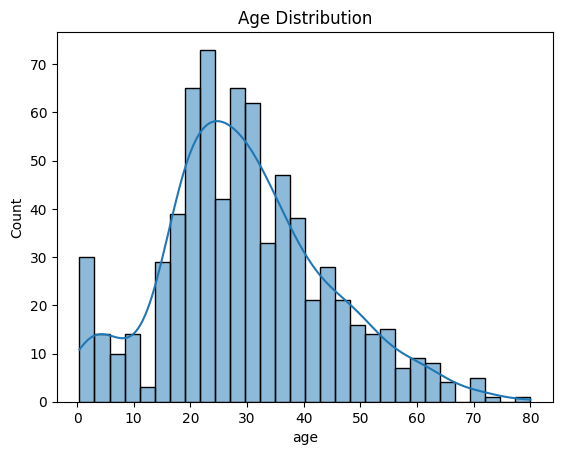

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

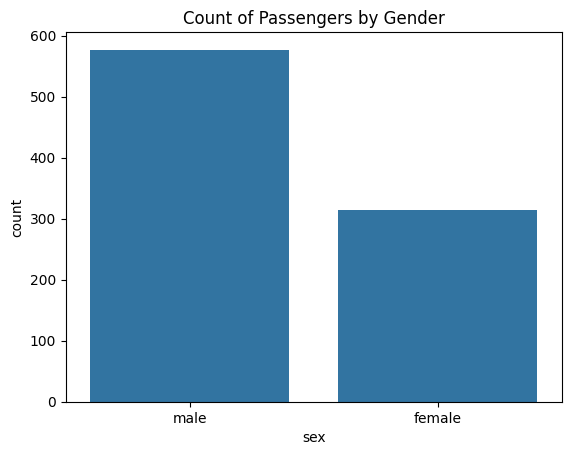

In [ ]:
sns.countplot(x='sex', data=data)
plt.title('Count of Passengers by Gender')
plt.show()